In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings; warnings.simplefilter('ignore')

In [ ]:
book_data1 = pd.read_csv("/content/Books_with_Genre.csv")
book_data1.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Genre
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Mythology
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,Fiction
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,History
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,Medical
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,Archaeology


In [ ]:
book_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
 8   Genre                271360 non-null  object
dtypes: object(9)
memory usage: 18.6+ MB


In [ ]:
book_data1.shape

(271360, 9)

In [ ]:
users_data= pd.read_csv('/content/Users.csv')
users_data.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
users_data.shape

(278858, 3)

In [ ]:
ratings_data = pd.read_csv("/content/Ratings.csv")
ratings_data.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
ratings_data.shape

(1149780, 3)

# **Data Preparation (Data Cleaning and Feature Engineering)**

## replacing '-' with '_' and features name in lower case

In [ ]:
book_data1.columns= book_data1.columns.str.strip().str.lower().str.replace('-', '_')
users_data.columns= users_data.columns.str.strip().str.lower().str.replace('-', '_')
ratings_data.columns= ratings_data.columns.str.strip().str.lower().str.replace('-', '_')

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
book_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271360 non-null  object
 1   book_title           271360 non-null  object
 2   book_author          271358 non-null  object
 3   year_of_publication  271360 non-null  object
 4   publisher            271358 non-null  object
 5   image_url_s          271360 non-null  object
 6   image_url_m          271360 non-null  object
 7   image_url_l          271357 non-null  object
 8   genre                271360 non-null  object
dtypes: object(9)
memory usage: 18.6+ MB


In [ ]:
print(book_data1.isnull().sum())

isbn                   0
book_title             0
book_author            2
year_of_publication    0
publisher              2
image_url_s            0
image_url_m            0
image_url_l            3
genre                  0
dtype: int64


In [ ]:
book_data1.loc[(book_data1['book_author'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,genre
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0751352497.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0751352497.01.LZZZZZZZ.jpg,Unknown
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.LZZZZZZZ.jpg,Unknown


In [ ]:
# nan values in particular column
book_data1.loc[(book_data1['publisher'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,genre
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg,Unknown
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg,Unknown


In [ ]:
# getting unique value from 'year_of_publication' feature
book_data1['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [ ]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title'
book_data1[book_data1['year_of_publication'] == 'DK Publishing Inc']

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,genre
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN,Unknown
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN,Unknown


In [ ]:
book_data1.loc[221678]

,221678
isbn,0789466953
book_title,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley"""
book_author,2000
year_of_publication,DK Publishing Inc
publisher,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg
image_url_s,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg
image_url_m,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg
image_url_l,NaN
genre,Unknown


In [ ]:
book_data1.loc[209538]

,209538
isbn,078946697X
book_title,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum"""
book_author,2000
year_of_publication,DK Publishing Inc
publisher,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
image_url_s,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg
image_url_m,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg
image_url_l,NaN
genre,Unknown


In [ ]:
book_data1.loc[220731]

,220731
isbn,2070426769
book_title,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio"""
book_author,2003
year_of_publication,Gallimard
publisher,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg
image_url_s,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg
image_url_m,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg
image_url_l,NaN
genre,Unknown


In [ ]:
# function to fix mismatch data in feature 'book_title', 'book_author', ' year_of_publication', 'publisher'
def replace_df_value(df, idx, col_name, val):
    df.loc[idx, col_name] = val
    return df

In [ ]:
replace_df_value(book_data1, 209538, 'book_title', 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)')
replace_df_value(book_data1, 209538, 'book_author', 'Michael Teitelbaum')
replace_df_value(book_data1, 209538, 'year_of_publication', 2000)
replace_df_value(book_data1, 209538, 'publisher', 'DK Publishing Inc')

replace_df_value(book_data1, 221678, 'book_title', 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)')
replace_df_value(book_data1, 221678, 'book_author', 'James Buckley')
replace_df_value(book_data1, 221678, 'year_of_publication', 2000)
replace_df_value(book_data1, 221678, 'publisher', 'DK Publishing Inc')

replace_df_value(book_data1, 220731,'book_title', "Peuple du ciel, suivi de 'Les Bergers")
replace_df_value(book_data1, 220731, 'book_author', 'Jean-Marie Gustave Le ClÃ?Â©zio')
replace_df_value(book_data1, 220731, 'year_of_publication', 2003)
replace_df_value(book_data1, 220731, 'publisher', 'Gallimard')

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,genre
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg,Mythology
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,Fiction
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg,History
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg,Medical
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg,Archaeology
...,...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0440400988.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0440400988.01.LZZZZZZZ.jpg,Unknown
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0525447644.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0525447644.01.LZZZZZZZ.jpg,Unknown
271357,006008667X,Lily Dale : The True Story of the Town that Talks to the Dead,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/006008667X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/006008667X.01.LZZZZZZZ.jpg,Unknown
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0192126040.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0192126040.01.LZZZZZZZ.jpg,Unknown


In [ ]:
book_data1.loc[209538]

,209538
isbn,078946697X
book_title,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"
book_author,Michael Teitelbaum
year_of_publication,2000
publisher,DK Publishing Inc
image_url_s,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg
image_url_m,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg
image_url_l,NaN
genre,Unknown


In [ ]:
book_data1.loc[221678]

,221678
isbn,0789466953
book_title,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"
book_author,James Buckley
year_of_publication,2000
publisher,DK Publishing Inc
image_url_s,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg
image_url_m,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg
image_url_l,NaN
genre,Unknown


In [ ]:
book_data1.loc[220731]

,220731
isbn,2070426769
book_title,"Peuple du ciel, suivi de 'Les Bergers"
book_author,Jean-Marie Gustave Le ClÃ?Â©zio
year_of_publication,2003
publisher,Gallimard
image_url_s,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg
image_url_m,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg
image_url_l,NaN
genre,Unknown


In [ ]:
book_data1.loc[(book_data1['publisher'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,genre
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg,Unknown
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg,Unknown


In [ ]:
# replacing 'Nan' with 'No Mention'
book_data1.loc[(book_data1['isbn'] == '193169656X'),'publisher'] = 'No Mention'
book_data1.loc[(book_data1['isbn'] == '1931696993'),'publisher'] = 'No Mention'

In [ ]:
df = pd.DataFrame(book_data1)
cols = [4]
df = df[df.columns[cols]]

In [ ]:
pd.set_option('display.max_columns', None)
df.head(5)

,publisher
0,Oxford University Press
1,HarperFlamingo Canada
2,HarperPerennial
3,Farrar Straus Giroux
4,W. W. Norton &amp; Company


In [ ]:
book_data1[book_data1['publisher'] == 'No Mention']

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,genre
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,No Mention,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg,Unknown
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,No Mention,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg,Unknown


In [ ]:
book_data1.loc[(book_data1['book_author'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,genre
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0751352497.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0751352497.01.LZZZZZZZ.jpg,Unknown
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.LZZZZZZZ.jpg,Unknown


In [ ]:
# replacing 'Nan' with 'No Mention'

book_data1.loc[(book_data1['isbn'] == '0751352497'),'book_author'] = 'No Mention'
book_data1.loc[(book_data1['isbn'] == '9627982032'),'book_author'] = 'No Mention'

In [ ]:
book_data1.isnull().sum()

,0
isbn,0
book_title,0
book_author,0
year_of_publication,0
publisher,0
image_url_s,0
image_url_m,0
image_url_l,3
genre,0


In [ ]:
book_data1.duplicated().sum()

0

In [ ]:
book_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271360 non-null  object
 1   book_title           271360 non-null  object
 2   book_author          271360 non-null  object
 3   year_of_publication  271360 non-null  object
 4   publisher            271360 non-null  object
 5   image_url_s          271360 non-null  object
 6   image_url_m          271360 non-null  object
 7   image_url_l          271357 non-null  object
 8   genre                271360 non-null  object
dtypes: object(9)
memory usage: 18.6+ MB


In [ ]:
book_data1.columns

Index(['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher',
       'image_url_s', 'image_url_m', 'image_url_l', 'genre'],
      dtype='object')

In [ ]:
import pickle
pickle.dump(book_data1,open('all_book_genre.pkl','wb'))

In [ ]:
import pickle
pickle.dump(book_data1,open('all_book.pkl','wb'))

## droping the url

In [ ]:
book_data1.drop(['image_url_s', 'image_url_m', 'image_url_l'], axis= 1, inplace= True)

In [ ]:
# users_data size
print(users_data.shape)

(278858, 3)


In [ ]:
# unique value in age
users_data['age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [ ]:
# replacing nan with average of 'age'
users_data['age'].fillna((users_data['age'].mean()), inplace=True)

In [ ]:
users_data['age'].unique()

array([ 34.7514337,  18.       ,  17.       ,  61.       ,  26.       ,
        14.       ,  25.       ,  19.       ,  46.       ,  55.       ,
        32.       ,  24.       ,  20.       ,  34.       ,  23.       ,
        51.       ,  31.       ,  21.       ,  44.       ,  30.       ,
        57.       ,  43.       ,  37.       ,  41.       ,  54.       ,
        42.       ,  50.       ,  39.       ,  53.       ,  47.       ,
        36.       ,  28.       ,  35.       ,  13.       ,  58.       ,
        49.       ,  38.       ,  45.       ,  62.       ,  63.       ,
        27.       ,  33.       ,  29.       ,  66.       ,  40.       ,
        15.       ,  60.       ,   0.       ,  79.       ,  22.       ,
        16.       ,  65.       ,  59.       ,  48.       ,  72.       ,
        56.       ,  67.       ,   1.       ,  80.       ,  52.       ,
        69.       ,  71.       ,  73.       ,  78.       ,   9.       ,
        64.       , 103.       , 104.       ,  12.       ,  74. 

In [ ]:
# retrieving age data between 5 to 90
users_data.loc[(users_data['age'] > 90) | (users_data['age'] < 5)] = np.nan

In [ ]:
users_data['age'].fillna((users_data['age'].mean()), inplace=True)

In [ ]:
users_data['age'].unique()

array([34.7514337 , 18.        , 17.        , 61.        , 26.        ,
       14.        , 25.        , 19.        , 46.        , 55.        ,
       32.        , 24.        , 20.        , 34.        , 23.        ,
       51.        , 31.        , 21.        , 44.        , 30.        ,
       57.        , 43.        , 37.        , 41.        , 54.        ,
       42.        , 50.        , 39.        , 53.        , 47.        ,
       36.        , 28.        , 35.        , 13.        , 58.        ,
       49.        , 38.        , 45.        , 62.        , 63.        ,
       27.        , 33.        , 29.        , 66.        , 40.        ,
       15.        , 60.        , 34.73485224, 79.        , 22.        ,
       16.        , 65.        , 59.        , 48.        , 72.        ,
       56.        , 67.        , 80.        , 52.        , 69.        ,
       71.        , 73.        , 78.        ,  9.        , 64.        ,
       12.        , 74.        , 75.        , 76.        , 83.  

In [ ]:
ratings_data.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
# finding unique ISBNs from rating and book dataset
unique_ratings = ratings_data[ratings_data.isbn.isin(book_data1.isbn)]
unique_ratings

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


In [ ]:
print(ratings_data.shape)
print(unique_ratings.shape)

(1149780, 3)
(1031136, 3)


In [ ]:
# unique ratings from 'book_rating' feature
unique_ratings['book_rating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2])

Text(0.5, 1.0, 'Top 20 author with number of books')

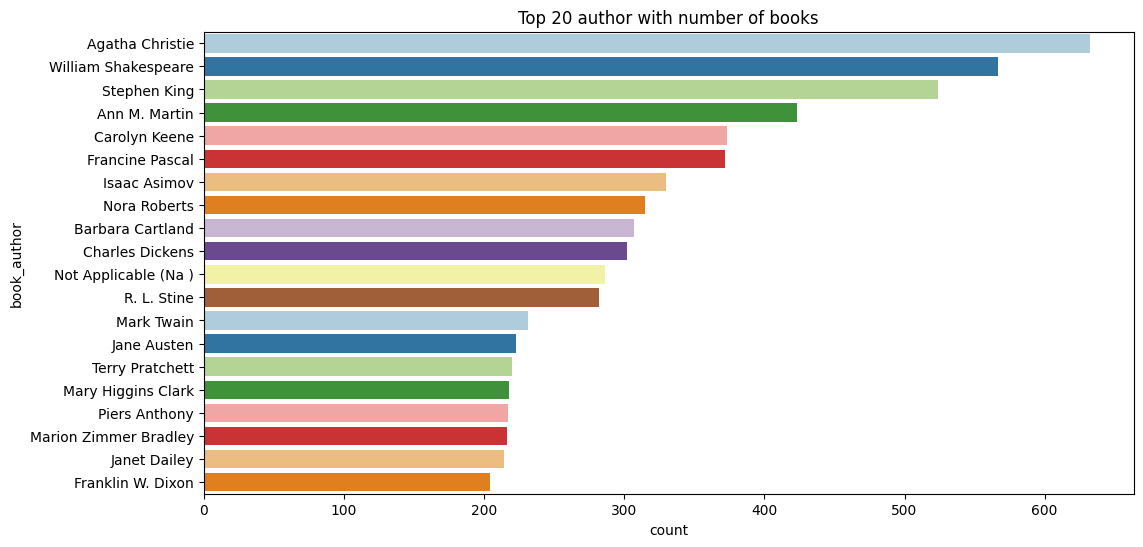

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y="book_author",palette = 'Paired', data=book_data1,order=book_data1['book_author'].value_counts().index[0:20])
plt.title("Top 20 author with number of books")

Text(0.5, 1.0, 'Top 20 Publishers with number of books published')

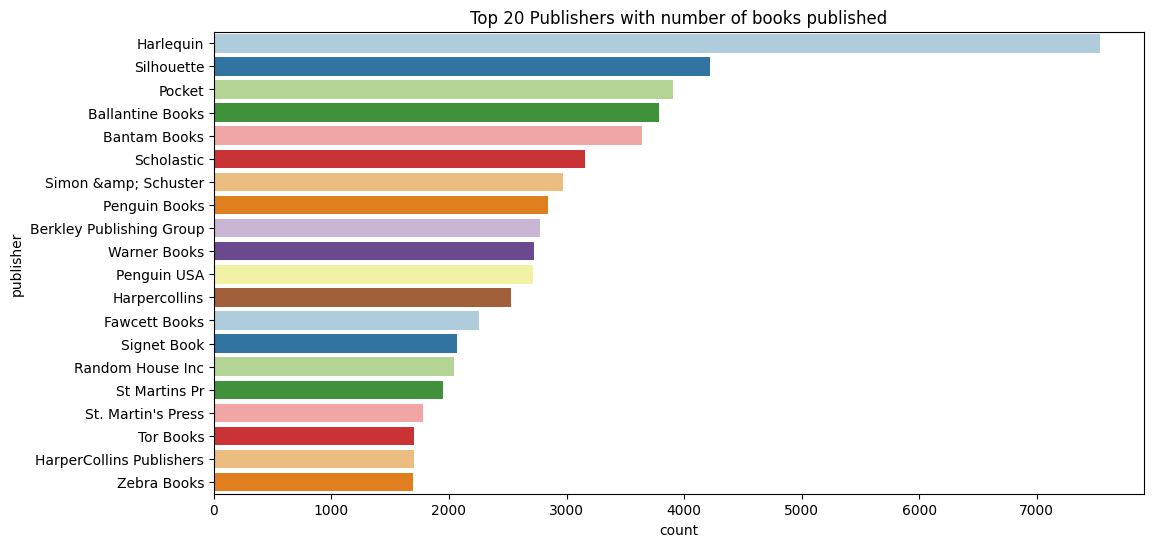

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y="publisher",palette = 'Paired', data=book_data1,order=book_data1['publisher'].value_counts().index[0:20])
plt.title("Top 20 Publishers with number of books published")

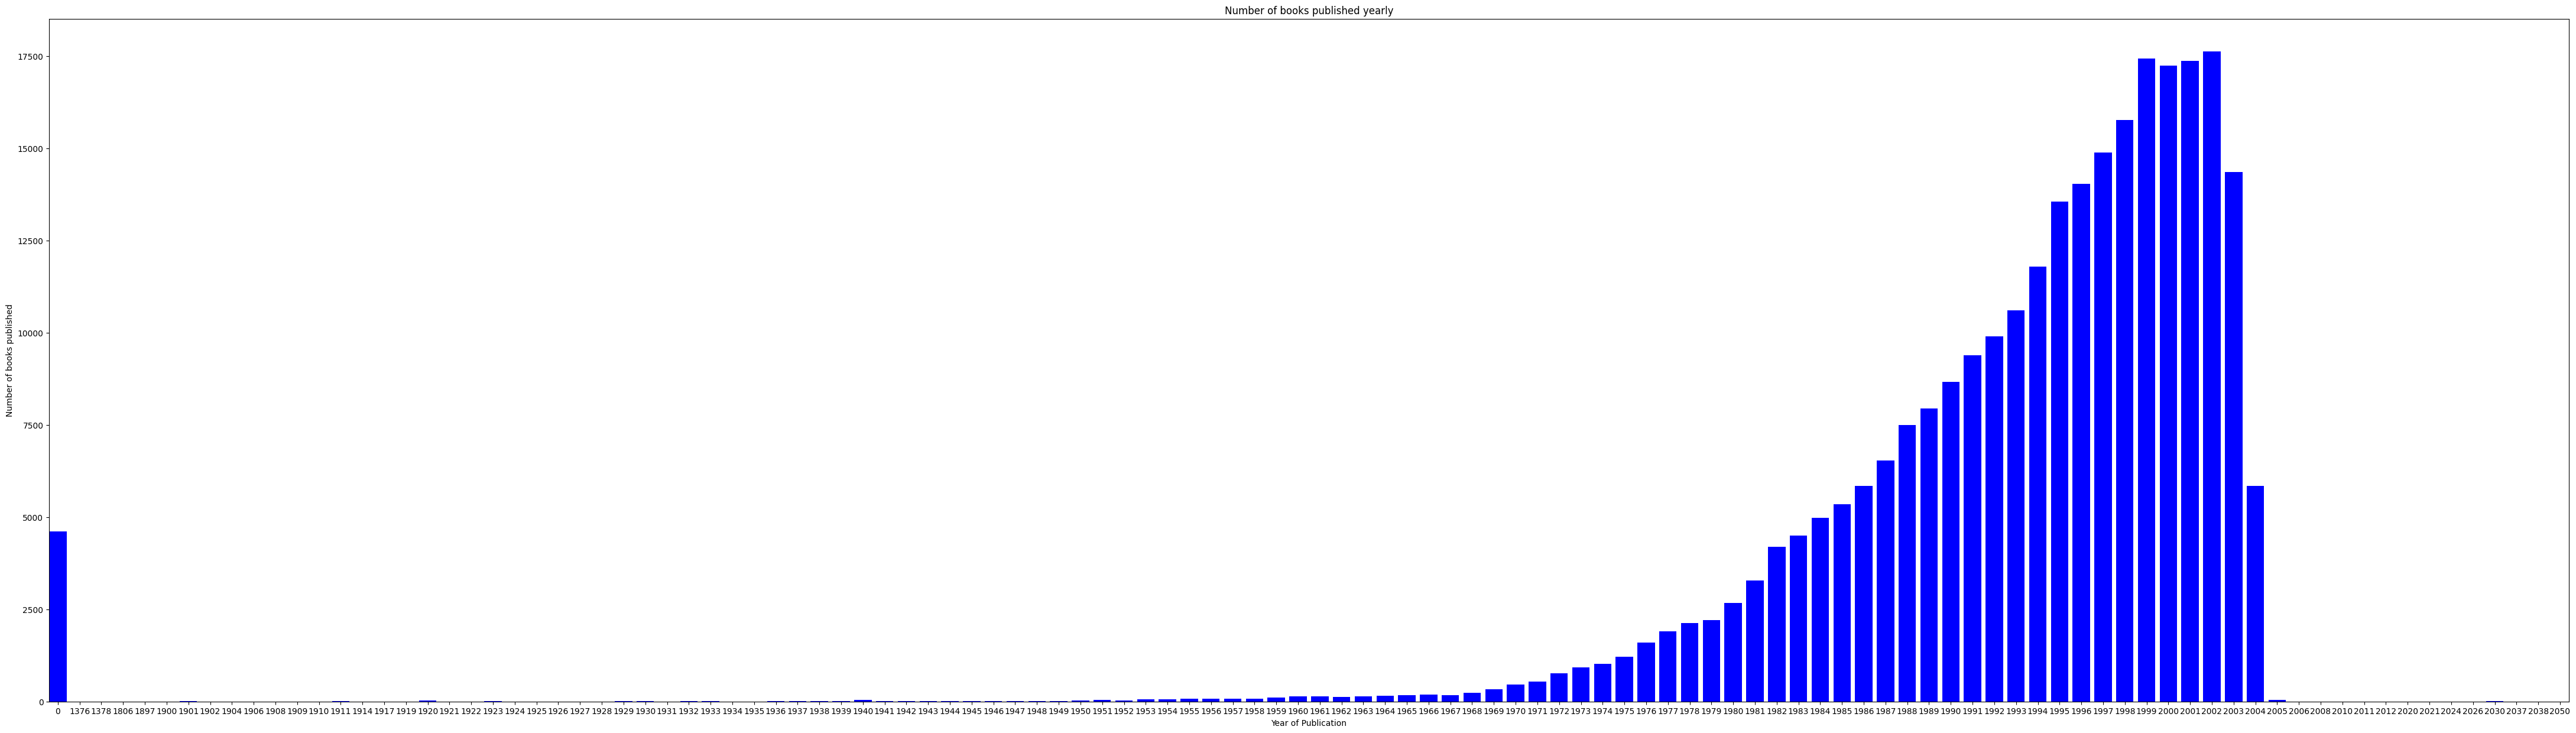

In [ ]:
publications = {}
for year in book_data1['year_of_publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(55, 15))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.show()

In [ ]:
book_data1.year_of_publication = pd.to_numeric(book_data1.year_of_publication, errors='coerce')

# Checking for 0's or NaNs in Year of Publication
zero_year = book_data1[book_data1.year_of_publication == 0].year_of_publication.count()
nan_year = book_data1.year_of_publication.isnull().sum()

print(f'There are {zero_year} entries as \'0\', and {nan_year} NaN entries in the Year of Publication field')

# Replace all years of zero with NaN
book_data1.year_of_publication.replace(0, np.nan, inplace=True)

There are 4618 entries as '0', and 0 NaN entries in the Year of Publication field


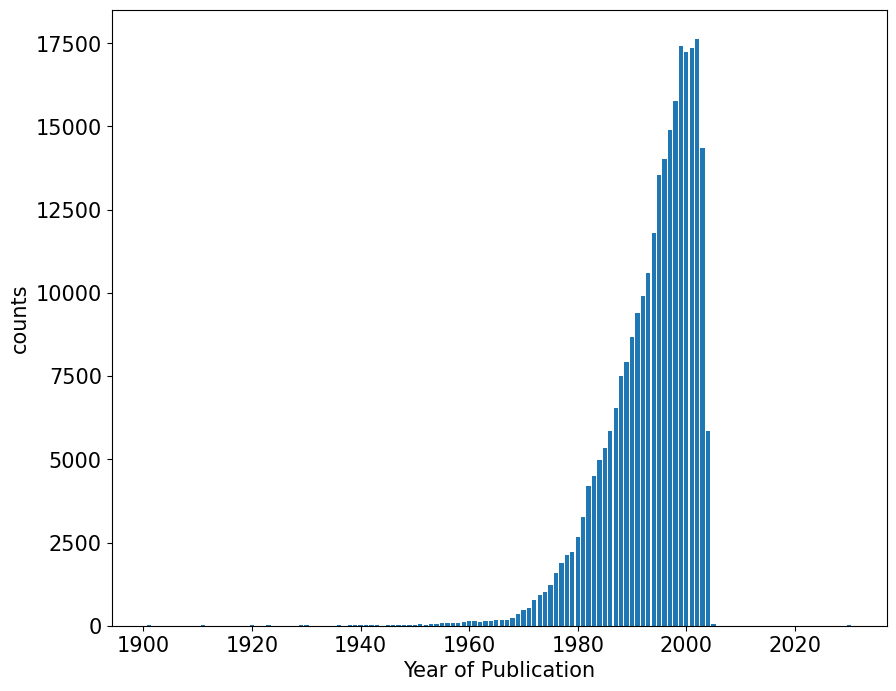

In [ ]:
year = book_data1.year_of_publication.value_counts().sort_index()
year = year.where(year>5)
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 15})
plt.bar(year.index, year.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.show()

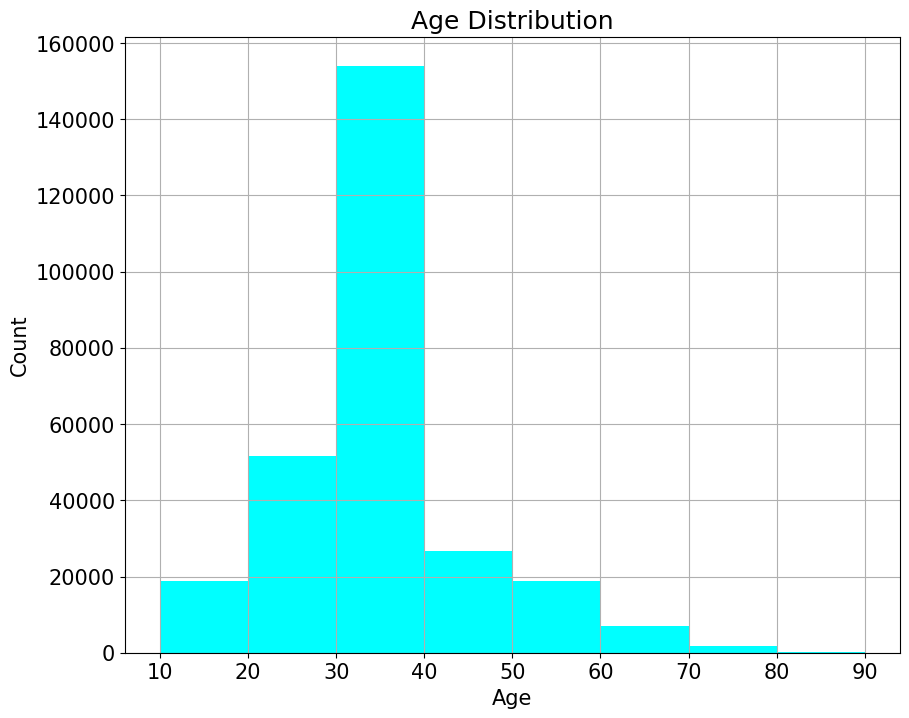

In [ ]:
plt.figure(figsize=(10,8))
users_data.age.hist(bins=[10*i for i in range(1, 10)], color = 'cyan')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Top 20 books as per number of ratings')

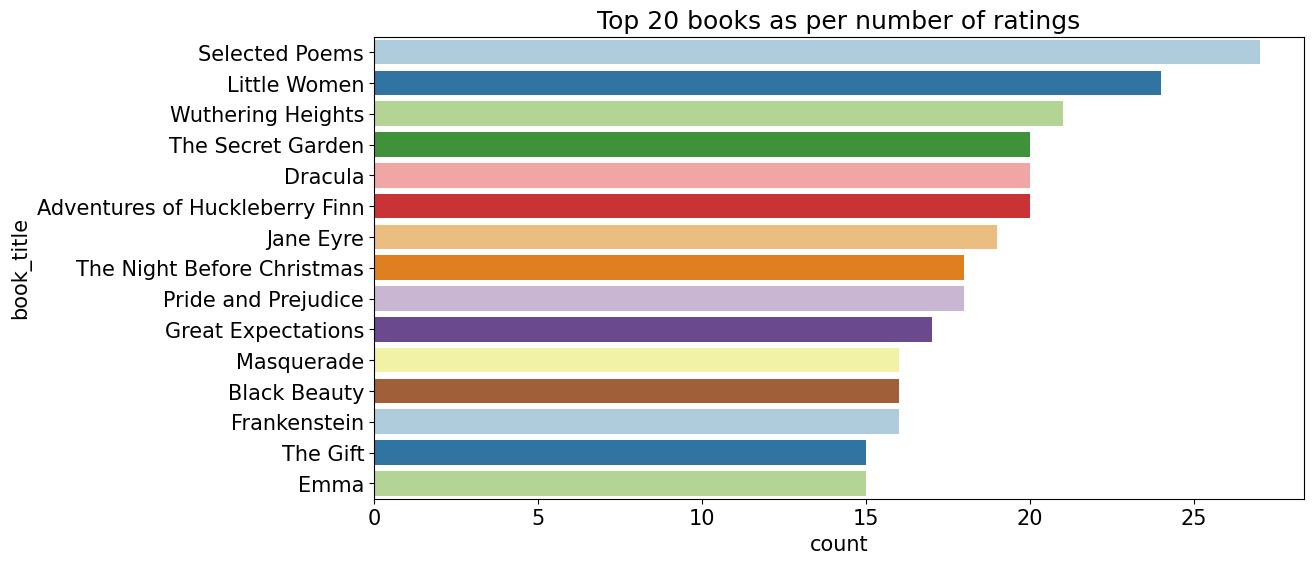

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y="book_title",palette = 'Paired',data= book_data1, order=book_data1['book_title'].value_counts().index[0:15])
plt.title("Top 20 books as per number of ratings")

<Axes: xlabel='book_rating', ylabel='count'>

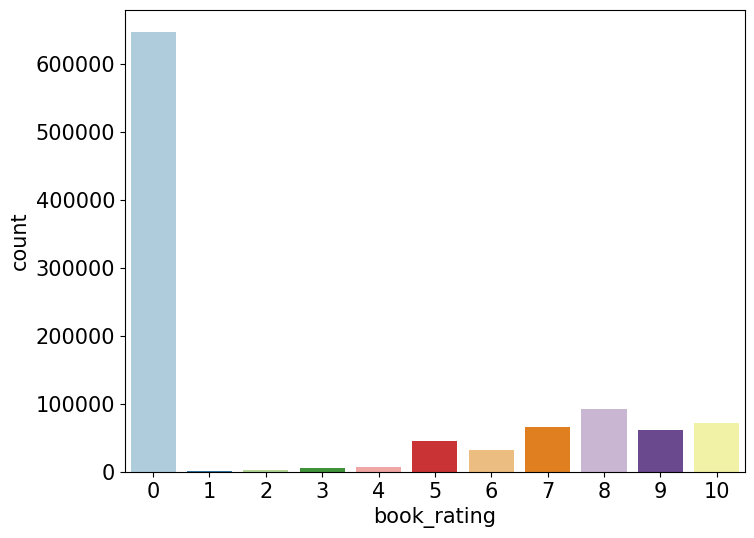

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x="book_rating",palette = 'Paired',data= unique_ratings)

Text(0.5, 1.0, 'Explicit Ratings')

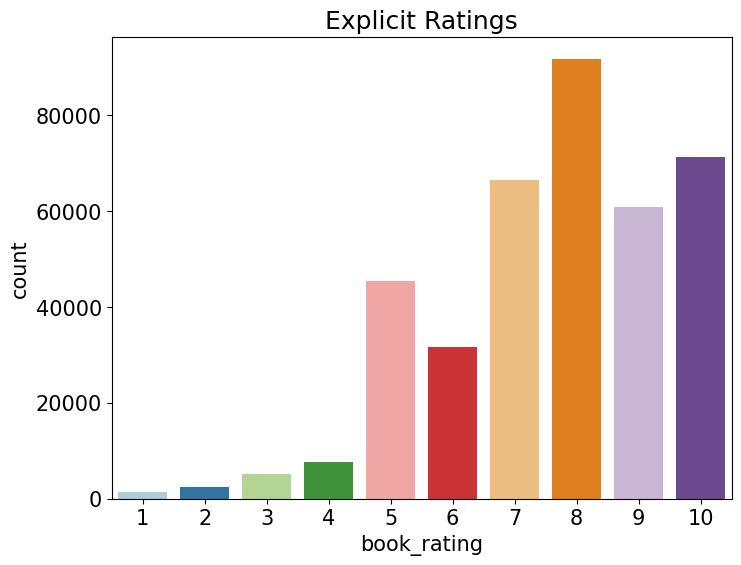

In [ ]:
# Explicit Ratings
plt.figure(figsize=(8,6))
rate_data = unique_ratings[unique_ratings['book_rating'] != 0]
sns.countplot(x="book_rating",palette = 'Paired',data=rate_data)
plt.title("Explicit Ratings")

# Recommendation System

In [ ]:
ratings_with_name = ratings_data.merge(book_data1,on='isbn')

In [ ]:
ratings_with_name

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,genre
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,Unknown
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle,Unknown
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books,Unknown
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,Unknown
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge English Readers),Sue Leather,2001.0,Cambridge University Press,Unknown
...,...,...,...,...,...,...,...,...
1031131,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book of Life,Kevin J. Todeschi,1998.0,A.R.E. Press (Association of Research &amp; Enlig,Unknown
1031132,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the Savvy Consumer,Clark Howard,2000.0,Longstreet Press,Unknown
1031133,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Program for Taking Full Advantage of Your Body's Natural Healing Power (Proven Program for Taking Full Advantage of Your Body's Natural Healing Power),Andrew Weil,1997.0,Alfred A. Knopf,Unknown
1031134,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books,Unknown


In [ ]:
x = ratings_with_name.groupby('user_id').count()['book_rating'] > 200
educated_users = x[x].index


In [ ]:
educated_users

Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,   6323,
         6543,
       ...
       271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427, 277639,
       278418],
      dtype='int64', name='user_id', length=811)

In [ ]:
filtered_rating = ratings_with_name[ratings_with_name['user_id'].isin(educated_users)]

In [ ]:
filtered_rating

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,genre
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,Unknown
1151,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995.0,John Wiley &amp; Sons,Unknown
1152,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974.0,Thomson Learning,Unknown
1153,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982.0,Henry Holt &amp; Co,Unknown
1154,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002.0,Avon Books,Unknown
...,...,...,...,...,...,...,...,...
1029357,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventures of a Mountain Man Wannabe (Capital Discoveries Book),Mike Tougias,2002.0,Capital Books (VA),Unknown
1029358,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993.0,"Bibliographisches Institut, Mannheim",Unknown
1029359,275970,3829021860,0,The Penis Book,Joseph Cohen,1999.0,Konemann,Unknown
1029360,275970,4770019572,0,Musashi,Eiji Yoshikawa,1995.0,Kodansha International (JPN),Unknown


## with book title

In [ ]:
y = filtered_rating.groupby('book_title').count()['book_rating']>=50
famous_books = y[y].index

In [ ]:
final_ratings = filtered_rating[filtered_rating['book_title'].isin(famous_books)]

In [ ]:
pt = final_ratings.pivot_table(index='book_title',columns='user_id',values='book_rating')

In [ ]:
pt.fillna(0,inplace=True)

In [ ]:
pt

user_id,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,6563,6575,7158,7286,7346,7915,8067,8245,8681,8936,10447,10819,11601,11676,11993,12538,12824,12982,13082,13273,13552,13850,14422,14521,15408,15418,16106,16634,16795,16916,16966,17950,18067,18401,19085,19664,20115,20201,21014,21252,21576,21659,22625,23288,23768,23872,23902,24194,24921,25409,25601,25981,26516,26535,26544,26583,26593,27617,28204,28360,28523,28591,29259,29855,30276,30487,30511,30533,30711,30735,30972,31315,31391,31556,31826,31846,32195,32440,32721,32773,33974,35050,35836,35857,35859,36606,36609,36836,36907,37567,37712,37950,38023,38273,38781,39281,39467,39616,39646,39773,40889,40943,41084,41841,42914,43246,43806,43842,44595,44728,46398,47316,48494,49109,49460,49889,50225,51094,51350,51386,51450,51883,52199,52584,52614,52853,52917,53174,53628,53729,54218,55187,55490,55492,55548,55734,55892,56271,56399,56447,56856,56959,59172,59971,60244,60277,60337,60707,61619,62272,62891,62895,63394,63714,63938,64436,65258,66680,67840,68555,69042,69078,69232,69355,69405,69697,69808,69971,70052,70415,70594,71712,72352,72992,73394,73651,75591,75860,76151,76223,76352,76499,76626,76818,76942,77809,77940,78553,78783,78834,78973,79186,79441,80538,80683,81045,81492,81560,81977,82407,82831,82893,82926,83637,84024,85426,85526,85656,85701,85757,85993,86202,86243,86641,87141,87143,87555,87746,87974,88283,88677,88693,88733,88937,89602,91203,91342,91832,91931,92547,92652,92810,92979,93047,93085,93363,93629,94242,94347,94853,94923,95193,95316,95359,95903,95932,95991,96054,96448,97874,98391,98741,98758,100459,100644,100846,100906,101209,101851,101876,102275,102647,102702,102967,104399,104429,104636,104665,105374,105517,105979,106225,106816,107021,107301,107453,107784,107951,108005,108285,108352,109461,109574,109955,110029,110483,110912,110934,110973,111174,111947,112001,112026,112881,113270,113519,113817,113904,113983,114178,114368,114414,114444,114868,114988,115002,115003,115120,115490,116599,117251,117539,119575,120093,120548,122429,122793,122881,123790,123883,123981,124078,124079,124363,124487,124942,125039,125519,125692,125774,126492,126604,126736,127200,127233,127359,127429,127914,128696,128835,129008,129074,129358,129465,129716,129851,130474,130554,130571,131027,131046,131402,131837,131855,132083,133571,133689,133747,133868,135045,135149,135265,135458,135831,136010,136139,136205,136252,136382,137589,137688,138097,138441,138578,138844,139467,139742,140000,140036,140358,141493,141710,142093,142524,143175,143253,143415,143792,144531,144555,145449,145451,145619,145641,146113,146230,146348,147141,147451,147847,147965,148199,148258,148744,149069,149907,149908,149934,150124,150498,150968,150979,151790,151806,152186,152249,153563,153662,153718,154992,155014,155147,155219,155495,156150,156269,156467,157273,157811,158295,159033,159376,159858,160032,160819,161752,162052,162639,162738,163804,163973,164027,164323,164465,164533,164675,164828,165232,165308,165319,166123,166596,167349,167471,167800,168047,168064,168144,168245,169233,169663,169699,170229,170513,170518,170575,170634,170742,170947,171118,172030,172512,172742,173291,173415,173632,173684,173835,174216,174304,174791,175003,175886,177072,177090,177374,177432,177458,177690,178181,178199,178667,178950,179733,179744,179772,179978,180348,180586,180651,180917,180957,181176,181687,182085,182086,182987,182993,183196,183995,184299,185233,185384,186570,187145,187256,187517,188010,189334,189516,189835,189973,190459,190708,190807,190925,191187,192093,193499,193560,194600,194669,195694,196047,196077,196160,196457,196502,197364,197659,197775,198621,198699,198711,199416,199772,200226,200674,201017,201290,201447,201526,201674,201768,201783,203240,203799,203968,204167,204522,204591,204864,205473,205735,205980,206074,206534,206567,206979,207246,207349,207499,207782,208141,208147,208406,208410,208568,208671,208829,209373,209516,209756,209875,210035,210485,210792,210959,211426,211430,211847,211919,212645,212898,212923,212965,213150,213350,214272,214786,216012

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity_scores = cosine_similarity(pt)

In [ ]:
similarity_scores.shape

(706, 706)

In [ ]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]

    data = []
    for i in similar_items:
        item = []
        temp_df = book_data1[book_data1['book_title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('book_title')['book_title'].values))
        item.extend(list(temp_df.drop_duplicates('book_title')['book_author'].values))

        data.append(item)

    return data

In [ ]:
recommend('The Notebook')

[['A Walk to Remember', 'Nicholas Sparks'],
 ['The Rescue', 'Nicholas Sparks'],
 ['One Door Away from Heaven', 'Dean R. Koontz'],
 ['Toxin', 'Robin Cook']]

## with author

In [ ]:
y = filtered_rating.groupby('book_author').count()['book_rating']>=50
famous_books = y[y].index
final_ratings = filtered_rating[filtered_rating['book_author'].isin(famous_books)]
pt_author = final_ratings.pivot_table(index='book_author',columns='user_id',values='book_rating')
pt_author.fillna(0,inplace=True)
pt_author

user_id,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,6563,6575,7158,7286,7346,7915,8067,8245,8681,8890,8936,10447,10819,11601,11676,11993,12538,12824,12982,13082,13273,13552,13850,14422,14521,15408,15418,16106,16634,16795,16916,16966,17950,18067,18401,19085,19664,20115,20201,21014,21252,21576,21659,22625,23288,23768,23872,23902,24194,24921,25409,25601,25981,26516,26535,26544,26583,26593,27617,28204,28360,28523,28591,29259,29855,30276,30487,30511,30533,30711,30735,30972,31315,31391,31556,31826,31846,32195,32440,32721,32773,33974,35050,35836,35857,35859,36606,36609,36836,36907,37567,37712,37950,38023,38273,38781,39281,39467,39616,39646,39773,40889,40943,41084,41841,42914,43246,43806,43842,44595,44728,46398,47316,48494,49109,49460,49889,50225,51094,51350,51386,51450,51883,52199,52584,52614,52853,52917,53174,53628,53729,54218,55187,55490,55492,55548,55734,55892,56271,56399,56447,56856,56959,59172,59971,60244,60277,60337,60707,61619,62272,62891,62895,63394,63714,63938,64436,65258,66680,67840,68555,69042,69078,69232,69355,69405,69697,69808,69971,70052,70415,70594,71712,72352,72992,73394,73651,75591,75860,76151,76223,76352,76499,76626,76818,76942,77809,77940,78553,78783,78834,78973,79186,79441,80538,80683,81045,81492,81560,81977,82407,82831,82893,82926,83637,84024,85426,85526,85656,85701,85757,85993,86202,86243,86641,87141,87143,87555,87746,87974,88283,88677,88693,88733,88937,89602,91203,91342,91832,91931,92547,92652,92810,92979,93047,93085,93363,93629,94242,94347,94853,94923,95193,95316,95359,95903,95932,95991,96054,96448,97874,98391,98741,98758,100459,100644,100846,100906,101209,101851,101876,102275,102647,102702,102967,104399,104429,104636,104665,105374,105517,105979,106225,106816,107021,107301,107453,107784,107951,108005,108285,108352,109461,109574,109955,110029,110483,110912,110934,110973,111174,111947,112001,112026,112881,113270,113519,113817,113904,113983,114178,114368,114414,114444,114868,114988,115002,115003,115120,115490,116599,117251,117539,119575,120093,120548,122429,122793,122881,123790,123883,123981,124078,124079,124363,124487,124942,125039,125519,125692,125774,126492,126604,126736,127200,127233,127359,127429,127914,128696,128835,129008,129074,129358,129465,129716,129851,130474,130554,130571,131027,131046,131402,131837,131855,132083,133571,133689,133747,133868,135045,135149,135265,135458,135831,136010,136139,136205,136252,136382,137589,137688,138097,138441,138578,138844,139467,139742,140000,140036,140358,141493,141710,142093,142524,143175,143253,143415,143792,144531,144555,145449,145451,145619,145641,146113,146230,146348,147141,147451,147847,147965,148199,148258,148744,149069,149907,149908,149934,150124,150498,150968,150979,151790,151806,152186,152249,153563,153662,153718,154992,155014,155147,155219,155495,156150,156269,156467,157273,157811,158295,159033,159376,159858,160032,160819,161752,162052,162639,162738,163804,163973,164027,164323,164465,164533,164675,164828,165232,165308,165319,166123,166596,167349,167471,167800,168047,168064,168144,168245,169233,169663,169699,170229,170513,170518,170575,170634,170742,170947,171118,172030,172512,172742,173291,173415,173632,173684,173835,174216,174304,174791,175003,175886,177072,177090,177374,177432,177458,177690,178181,178199,178667,178950,179733,179744,179772,179978,180348,180586,180651,180917,180957,181176,181687,182085,182086,182987,182993,183196,183995,184299,185233,185384,186570,187145,187256,187517,188010,189334,189516,189835,189973,190459,190708,190807,190925,191187,192093,193499,193560,194600,194669,195694,196047,196077,196160,196457,196502,197364,197659,197775,198621,198699,198711,199416,199772,200226,200674,201017,201290,201447,201526,201674,201768,201783,203240,203799,203968,204167,204522,204591,204864,205473,205735,205980,206074,206534,206567,206979,207246,207349,207499,207782,208141,208147,208406,208410,208568,208671,208829,209373,209516,209756,209875,210035,210485,210792,210959,211426,211430,211847,211919,212645,212898,212923,212965,213150,213350,214272,214786,2

In [ ]:
pt_author.index

Index(['A. A. Milne', 'A. Manette Ansay', 'A.S. BYATT', 'ADRIANA TRIGIANI',
       'ANN BRASHARES', 'ANN PACKER', 'ANNA QUINDLEN', 'ANNE FRANK',
       'ANNE RICE', 'ANNE TYLER',
       ...
       'William Styron', 'William Trevor', 'William W. Johnstone',
       'Wilson Rawls', 'Winston Groom', 'Yann Martel', 'Zadie Smith',
       'Zane Grey', 'Zilpha Keatley Snyder', 'Zora Neale Hurston'],
      dtype='object', name='book_author', length=1486)

In [ ]:
similarity_scores_author = cosine_similarity(pt_author)

In [ ]:
def recommend(book_author):
    # index fetch
    index = np.where(pt_author.index==book_author)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores_author[index])),key=lambda x:x[1],reverse=True)[1:5]
    print(similar_items)
    data = []
    for i in similar_items:
        item = []
        temp_df = book_data1[book_data1['book_author'] == pt_author.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('book_author')['book_title'].values))
        item.extend(list(temp_df.drop_duplicates('book_author')['book_author'].values))

        data.append(item)

    return data

In [ ]:
recommend('Yann Martel')

[(1255, 0.2471763439329877), (1218, 0.24289384128235153), (28, 0.22884369266263743), (704, 0.22878101922395389)]


[['The Satanic Verses', 'Salman Rushdie'],
 ['Gap Creek: The Story of a Marriage', 'Robert Morgan'],
 ['The Lovely Bones: A Novel', 'Alice Sebold'],
 ['A Confederacy of Dunces (Evergreen Book)', 'John Kennedy Toole']]

In [ ]:
import pickle
pickle.dump(pt_author,open('pt_author.pkl','wb'))
pickle.dump(similarity_scores_author,open('similarity_scores_author.pkl','wb'))

## with publisher

In [ ]:
y = filtered_rating.groupby('publisher').count()['book_rating']>=50
famous_books = y[y].index
final_ratings = filtered_rating[filtered_rating['publisher'].isin(famous_books)]
pt_publisher = final_ratings.pivot_table(index='publisher',columns='user_id',values='book_rating')
pt_publisher.fillna(0,inplace=True)
pt_publisher

user_id,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,6563,6575,7158,7286,7346,7915,8067,8245,8681,8890,8936,10447,10819,11601,11676,11993,12538,12824,12982,13082,13273,13552,13850,14422,14521,15408,15418,16106,16634,16795,16916,16966,17950,18067,18401,19085,19664,20115,20201,21014,21252,21576,21659,22625,23288,23768,23872,23902,24194,24921,25409,25601,25981,26516,26535,26544,26583,26593,27617,28204,28360,28523,28591,29259,29855,30276,30487,30511,30533,30711,30735,30972,31315,31391,31556,31826,31846,32195,32440,32721,32773,33974,35050,35836,35857,35859,36606,36609,36836,36907,37567,37712,37950,38023,38273,38781,39281,39467,39616,39646,39773,40889,40943,41084,41841,42914,43246,43806,43842,44595,44728,46398,47316,48494,49109,49460,49889,50225,51094,51350,51386,51450,51883,52199,52584,52614,52853,52917,53174,53628,53729,54218,55187,55490,55492,55548,55734,55892,56271,56399,56447,56856,56959,59172,59971,60244,60277,60337,60707,61619,62272,62891,62895,63394,63714,63938,64436,65258,66680,67840,68555,69042,69078,69232,69355,69405,69697,69808,69971,70052,70415,70594,71712,72352,72992,73394,73651,75591,75860,76151,76223,76352,76499,76626,76818,76942,77809,77940,78553,78783,78834,78973,79186,79441,80538,80683,81045,81492,81560,81977,82407,82831,82893,82926,83637,84024,85426,85526,85656,85701,85757,85993,86202,86243,86641,87141,87143,87555,87746,87974,88283,88677,88693,88733,88937,89602,91203,91342,91832,91931,92547,92652,92810,92979,93047,93085,93363,93629,94242,94347,94853,94923,95193,95316,95359,95903,95932,95991,96054,96448,97874,98391,98741,98758,100459,100644,100846,100906,101209,101851,101876,102275,102647,102702,102967,104399,104429,104636,104665,105374,105517,105979,106225,106816,107021,107301,107453,107784,107951,108005,108285,108352,109461,109574,109955,110029,110483,110912,110934,110973,111174,111947,112001,112026,112881,113270,113519,113817,113904,113983,114178,114368,114414,114444,114868,114988,115002,115003,115120,115490,116599,117251,117539,119575,120093,120548,122429,122793,122881,123790,123883,123981,124078,124079,124363,124487,124942,125039,125519,125692,125774,126492,126604,126736,127200,127233,127359,127429,127914,128696,128835,129008,129074,129358,129465,129716,129851,130474,130554,130571,131027,131046,131402,131837,131855,132083,133571,133689,133747,133868,135045,135149,135265,135458,135831,136010,136139,136205,136252,136382,137589,137688,138097,138441,138578,138844,139467,139742,140000,140036,140358,141493,141710,142093,142524,143175,143253,143415,143792,144531,144555,145449,145451,145619,145641,146113,146230,146348,147141,147451,147847,147965,148199,148258,148744,149069,149907,149908,149934,150124,150498,150968,150979,151790,151806,152186,152249,153563,153662,153718,154992,155014,155147,155219,155495,156150,156269,156467,157273,157811,158295,159033,159376,159858,160032,160819,161752,162052,162639,162738,163804,163973,164027,164323,164465,164533,164675,164828,165232,165308,165319,166123,166596,167349,167471,167800,168047,168064,168144,168245,169233,169663,169699,170229,170513,170518,170575,170634,170742,170947,171118,172030,172512,172742,173291,173415,173632,173684,173835,174216,174304,174791,175003,175886,177072,177090,177374,177432,177458,177690,178181,178199,178667,178950,179733,179744,179772,179978,180348,180586,180651,180917,180957,181176,181687,182085,182086,182987,182993,183196,183995,184299,185233,185384,186570,187145,187256,187517,188010,189334,189516,189835,189973,190459,190708,190807,190925,191187,192093,193499,193560,194600,194669,195694,196047,196077,196160,196457,196502,197364,197659,197775,198621,198699,198711,199416,199772,200226,200674,201017,201290,201447,201526,201674,201768,201783,203240,203799,203968,204167,204522,204591,204864,205473,205735,205980,206074,206534,206567,206979,207246,207349,207499,207782,208141,208147,208406,208410,208568,208671,208829,209373,209516,209756,209875,210035,210485,210792,210959,211426,211430,211847,211919,212645,212898,212923,212965,213150,213350,214272,214786,2

In [ ]:
similarity_scores_publisher = cosine_similarity(pt_publisher)

In [ ]:
import pickle
pickle.dump(pt_publisher,open('pt_publisher.pkl','wb'))
pickle.dump(similarity_scores_publisher,open('similarity_scores_publisher.pkl','wb'))

## Based on Popularity(Average_rating):

In [ ]:
# Calculate the average rating for each book
book_avg_rating = ratings_data.groupby('isbn')['book_rating'].mean().reset_index()
book_avg_rating.columns = ['isbn', 'avg_rating']  # Rename columns for clarity

# Count the number of ratings each book has received
book_rating_counts = ratings_data.groupby('isbn')['book_rating'].count().reset_index()
book_rating_counts.columns = ['isbn', 'rating_count']  # Rename columns for clarity

# Merge the average rating data with the rating count data
popular_books = book_avg_rating.merge(book_rating_counts, on='isbn')

# Merge with book dataset to get book details
popular_books = popular_books.merge(book_data1, on='isbn')

# Filter books with a minimum number of ratings (e.g., at least 50) to ensure reliability
popular_books = popular_books[popular_books['rating_count'] >= 50]

# Sort books by average rating in descending order to get the most popular books
popular_books = popular_books.sort_values(by='avg_rating', ascending=False)

# Display top 10 books based on popularity (average rating and sufficient number of ratings)
popular_books[['book_title', 'book_author', 'avg_rating', 'rating_count']].head(10)


,book_title,book_author,avg_rating,rating_count
236927,Free,Paul Vincent,7.962963,54
83625,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,6.611765,170
83867,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,6.541237,194
83846,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,6.467005,197
125011,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,6.363095,168
129842,"The Fellowship of the Ring (The Lord of the Rings, Part 1)",J. R. R. Tolkien,6.206349,63
68331,The Stand (The Complete and Uncut Edition),Stephen King,6.175439,57
198056,Griffin &amp; Sabine: An Extraordinary Correspondence,Nick Bantock,6.041667,72
23351,The Little Prince,Antoine de Saint-ExupÃ©ry,5.797468,79
74683,The Cat in the Hat,Dr. Seuss,5.730769,52


The difference between recommendations based on average rating and those based solely on `book_rating` lies in how they handle the volume of ratings.

**Average Rating:**  This method calculates the average rating for each book and then ranks them.  Crucially, it often includes a filter (as seen in your code with `combined = combined[combined['ratings_count'] > 50]`). This filter is essential.  A book with a single 5-star rating has a perfect average, but it's not necessarily a good indicator of overall quality.  The filter helps ensure recommendations are based on books with a sufficient number of reviews to provide a reliable average.

**Book Rating (without considering count):**  Simply ranking books by `book_rating` means a book with one or few high ratings would rank highly, even if it lacks broader appeal.  It does not consider the number of people who rated the book, which makes the measure unreliable for suggesting popular items.

**Which is Better?**

The recommendation system based on **average rating with a minimum rating count filter** is significantly better.  It addresses the critical flaw of the simple `book_rating` approach by incorporating the number of ratings into its calculation.  A high average rating *with a substantial number of ratings* is a much more robust indicator of a book's quality and popularity.  The filter prevents a handful of enthusiastic reviews from inflating the perceived popularity of a less-known book.

In summary, your current approach is the correct one. The simple book rating method is easily manipulated and not a good metric for general recommendations.


# Memory-Based Collaborative Filtering

In [ ]:
ratings_explicit= unique_ratings[unique_ratings['book_rating'] != 0]   # explicit ratings represented by 1–10
ratings_implicit= unique_ratings[unique_ratings['book_rating'] == 0]   # implicit ratings represented by 0

ratings_explicit.head()

,user_id,isbn,book_rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


In [ ]:
print(unique_ratings.shape)
print(ratings_explicit.shape)

(1031136, 3)
(383842, 3)


In [ ]:
# Merging book_data dataset and ratings_explicit
new_book_df= pd.merge(book_data1, ratings_explicit, on='isbn')
new_book_df.head()

,isbn,book_title,book_author,year_of_publication,publisher,genre,user_id,book_rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,Fiction,8,5
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,Fiction,11676,8
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,Fiction,67544,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,Fiction,116866,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,Fiction,123629,9


In [ ]:
new_book_df['book_title'].count()


383842

In [ ]:
new_book_df['book_title'].nunique()

135567

In [ ]:
print(new_book_df.shape)

(383842, 8)


Explicit ratings are used for training the recommendation model since they represent real preferences.

## Train - Test Split

In [ ]:
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(new_book_df, test_size=0.20)

In [ ]:
print(f'Training set lengths: {len(train_data)}')
print(f'Testing set lengths: {len(test_data)}')
print(f'Test set is {(len(test_data)/(len(train_data)+len(test_data))*100):.0f}% of the full dataset.')

Training set lengths: 307073
Testing set lengths: 76769
Test set is 20% of the full dataset.


In [ ]:
# Get int mapping for user_id in train dataset
u_unique_train = train_data.user_id.unique()
train_data_user2idx = {o:i for i, o in enumerate(u_unique_train)}

# Get int mapping for isbn in train dataset
i_unique_train = train_data.isbn.unique()
train_data_book2idx = {o:i for i, o in enumerate(i_unique_train)}

Converts user IDs and ISBNs to integer indices.Because,Collaborative filtering models work better with numeric indexes instead of text.

In [ ]:
# Get int mapping for user_id in test dataset
u_unique_test = test_data.user_id.unique()
test_data_user2idx = {o:i for i, o in enumerate(u_unique_test)}

# Get int mapping for isbn in test dataset
i_unique_test = test_data.isbn.unique()
test_data_book2idx = {o:i for i, o in enumerate(i_unique_test)}

In [ ]:
# training set
train_data['u_unique'] = train_data['user_id'].map(train_data_user2idx)
train_data['i_unique'] = train_data['isbn'].map(train_data_book2idx)

# testing set
test_data['u_unique'] = test_data['user_id'].map(test_data_user2idx)
test_data['i_unique'] = test_data['isbn'].map(test_data_book2idx)

# Convert back to three feature of dataframe
train_data = train_data[['u_unique', 'i_unique', 'book_rating']]
#book_rating is the target variable that the model is trained to predict based on user and book features.


test_data = test_data[['u_unique', 'i_unique', 'book_rating']]

In [ ]:
train_data.sample(5)

,u_unique,i_unique,book_rating
260779,12985,40871,9
313484,708,34477,10
255842,96,34471,5
20350,147,4866,8
284300,32438,63648,7


In [ ]:
test_data.sample(5)

,u_unique,i_unique,book_rating
377031,146,40316,6
330639,4158,5356,7
347965,1214,1391,7
288349,222,39784,8
125806,4438,5768,8


## User-Item for Train Data

In [ ]:
# first I'll create an empty matrix of users books and then I'll add the appropriate values to the matrix by extracting them from the dataset
n_users = train_data['u_unique'].nunique()
n_books = train_data['i_unique'].nunique()

train_matrix = np.zeros((n_users, n_books))

for entry in train_data.itertuples():
    train_matrix[entry[1]-1, entry[2]-1] = entry[3]    # entry[1] is the user-id, entry[2] is the book-isbn and -1 is to counter 0-based indexing
    ## book_rating is entry[3]

Creates a user-item matrix (rows = users, columns = books, values = ratings).

Created To use matrix-based collaborative filtering (like cosine similarity and SVD).

In [ ]:
train_matrix.shape

(59833, 129063)

## User-Item for Test Data

In [ ]:
n_users = test_data['u_unique'].nunique()
n_books = test_data['i_unique'].nunique()

test_matrix = np.zeros((n_users, n_books))

for entry in test_data.itertuples():
    test_matrix[entry[1]-1, entry[2]-1] = entry[3]

In [ ]:
test_matrix.shape

(25874, 46667)

## Cosine Similarity Based Recommendation System

In [ ]:
# To make item-item similarity we need to take the transpose of the matrix
train_matrix_small = train_matrix[:5000, :5000]
test_matrix_small = test_matrix[:5000, :5000]

from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_matrix_small, metric='cosine')
item_similarity = pairwise_distances(train_matrix_small.T, metric='cosine')

Computes similarity between users and books.

If two users are similar, they’ll get similar book recommendations.

In [ ]:
# function to predict the similarity :
def predict_books(ratings, similarity, type='user'): # default type is 'user'
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)

        # Use np.newaxis so that mean_user_rating has the same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

Predicts user preferences using user or item similarity.
✅ Why?
To recommend books that are similar to ones the user already liked.

In [ ]:
item_prediction = predict_books(train_matrix_small, item_similarity, type='item')
user_prediction = predict_books(train_matrix_small, user_similarity, type='user')

## Evaluation Metric

In [ ]:
# Evaluation metric by mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, test_matrix):
    prediction = prediction[test_matrix.nonzero()].flatten()
    test_matrix = test_matrix[test_matrix.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, test_matrix))

print(f'Item-based CF RMSE: {rmse(item_prediction, test_matrix_small)}')
print(f'User-based CF RMSE: {rmse(user_prediction, test_matrix_small)}')

Item-based CF RMSE: 7.963567842352037
User-based CF RMSE: 7.96323510137194


*Item-based CF RMSE: 7.95 means that for the item-based collaborative filtering approach, the model's predicted ratings are on average about 7.95 units away from the actual ratings.

*User-based CF RMSE: 7.95 means that for the user-based collaborative filtering approach, the model's predicted ratings are also about 7.95 units away from the actual ratings.

In [ ]:
print(train_data.columns)

Index(['u_unique', 'i_unique', 'book_rating'], dtype='object')


# SVD Model

SVD is often a powerful tool in recommendation systems because it provides more sophisticated insights into user-item interactions, which can lead to more accurate predictions and ultimately better recommendations.

* Improve accuracy by capturing latent factors.

* Handle sparsity in the dataset.

* Optimize scalability for large datasets.

* Achieve better generalization by reducing overfitting.

In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505175 sha256=9f6e17554cc8865e1abc878ff1b67d97ef99419b08e6dfa487b0ccf27f72ada6
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
from surprise import Reader, Dataset

In [ ]:
# Creating a 'Reader' object to set the limit of the ratings
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings_explicit, reader)

* The Reader object defines the range of ratings (1 to 10).

* ratings_explicit contains book ratings explicitly provided by users.

* the Dataset.load_from_df() function loads this data into a format that Surprise can use.

In [ ]:
from surprise import SVD, model_selection, accuracy
model = SVD()

# Train on books dataset
%time model_selection.cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6349  1.6406  1.6302  1.6296  1.6410  1.6353  0.0049  
Fit time          12.01   6.48    6.76    6.79    7.12    7.83    2.10    
Test time         0.76    0.58    0.81    0.40    0.45    0.60    0.16    
CPU times: user 45.9 s, sys: 372 ms, total: 46.3 s
Wall time: 50.3 s


{'test_rmse': array([1.63491254, 1.6406356 , 1.6301734 , 1.62962211, 1.64101587]),
 'fit_time': (12.011120080947876,
  6.478679656982422,
  6.764798641204834,
  6.793110132217407,
  7.116643667221069),
 'test_time': (0.7551782131195068,
  0.5762302875518799,
  0.809065580368042,
  0.4016408920288086,
  0.4530801773071289)}

* Cross-validation (cv=5): Splits the data into 5 subsets, trains on 4, and tests on 1 in a rotating manner.

* RMSE (Root Mean Squared Error) is used to measure how well the model predicts user ratings.

* %time measures how long the cross-validation process takes.

# Train - Test Split

In [ ]:
# train and test split
trainset, testset = model_selection.train_test_split(data, test_size=0.2)

# SVD model
model = SVD()
model.fit(trainset)

# Evaluation metrics for SVD model

In [ ]:
# displaying RMSE score
predictions = model.test(testset)
print(f"The accuracy is {accuracy.rmse(predictions)}")

RMSE: 1.6358
The accuracy is 1.6358194945499394


* Lower RMSE = Better Model Performance

Before applying SVD, the RMSE for User-based CF and Item-based CF was ~7.95, which is very high.

After using SVD, RMSE dropped to 1.63, meaning the predictions are much closer to the actual ratings.

* Collaborative Filtering had a high error (~7.95) because it relied on sparse user-book interactions.

* SVD factorizes the rating matrix, capturing latent relationships between users and books, making predictions more accurate.


# Testing Results

In [ ]:
# to test result let's take an user-id and item-id to test our model.
uid = 276744
iid = '038550120X'
pred = model.predict(uid, iid, verbose=True)

user: 276744     item: 038550120X r_ui = None   est = 7.39   {'was_impossible': False}


In [ ]:
# display estimated rating and real rating
print(f'The estimated rating for the book with ISBN code {pred.iid} from user #{pred.uid} is {pred.est:.2f}.\n')
actual_rtg= ratings_explicit[(ratings_explicit.user_id==pred.uid) &
                             (ratings_explicit.isbn==pred.iid)].book_rating.values[0]
print(f'The real rating given for this was {actual_rtg:.2f}.')

The estimated rating for the book with ISBN code 038550120X from user #276744 is 7.39.

The real rating given for this was 7.00.


In [ ]:
# The following function was adapted from the surprise docs
# and can be used to get the top book recommendations for each user.
from collections import defaultdict

def get_top_n(predictions, n=10):

    # First map the predictions to each user
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [ ]:
# prediciton on teset and getting top predictions
pred = model.test(testset)
top_n = get_top_n(pred)

In [ ]:
pred_testset_df = pd.DataFrame(pred)
pred_testset_df

,uid,iid,r_ui,est,details
0,66073,0385722206,8.0,7.676009,{'was_impossible': False}
1,180591,0061057363,7.0,7.739207,{'was_impossible': False}
2,59438,0590032496,9.0,7.549542,{'was_impossible': False}
3,88605,0061097861,8.0,7.404935,{'was_impossible': False}
4,141444,0743418174,8.0,6.678102,{'was_impossible': False}
...,...,...,...,...,...
76764,98391,0375411992,8.0,7.897045,{'was_impossible': False}
76765,192995,158348616X,2.0,7.466933,{'was_impossible': False}
76766,52011,0380016648,5.0,6.404926,{'was_impossible': False}
76767,127441,0440217466,10.0,7.686688,{'was_impossible': False}


# Retrieving full book titles from full 'books_users_ratings' dataframe

In [ ]:
def get_reading_list(userid):

    reading_list = defaultdict(list)
    top_n = get_top_n(pred, n=10)
    for n in top_n[userid]:
        book, rating = n
        title = new_book_df.loc[new_book_df.isbn==book].book_title.unique()[0]
        reading_list[title] = rating
    return reading_list

In [ ]:
#take a random look at user_id
example_reading_list = get_reading_list(userid=116866)
for book, rating in example_reading_list.items():
    print(f'Book_Title : {book}, Book_Ratings : {rating}')

Book_Title : Clara Callan, Book_Ratings : 7.922204358880168
Book_Title : SHIPPING NEWS, Book_Ratings : 7.797557786531653
Book_Title : Isaac Newton: The Last Sorcerer (Helix Books), Book_Ratings : 7.7211529732032815
Book_Title : In the Suicide Mountains, Book_Ratings : 7.7211529732032815
Book_Title : Introduction to ATM Design and Performance: With Applications Analysis Software, Book_Ratings : 7.7211529732032815
Book_Title : The Best of Creative Computing, Book_Ratings : 7.7211529732032815
Book_Title : Full Spectrum 3, Book_Ratings : 7.7211529732032815
Book_Title : Fireworks 2 for Windows and Macintosh Visual Quickstart Guide, Book_Ratings : 7.7211529732032815
Book_Title : Discrete Multivariate Analysis: Theory and Practice, Book_Ratings : 7.7211529732032815
Book_Title : Landmarks in Western Science: From Prehistory to the Atomic Age, Book_Ratings : 7.7211529732032815
